# <center>Uczenie maszynowe</center>

<br>

<br>

## <center>Proces rozwiązywania problemów z zastosowaniem uczenia maszynowego</center>

<img src="Grafika/CRISP_DM_Process_Diagram.png" width="350">
Źródło: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/897px-CRISP-DM_Process_Diagram.png

<br>

<br>

<br>

<br>

<br>




 <br>

## Kilka faktów na temat uczenia maszynowego

* ML to zarówno nauka jak i sztuka.

* Nie istnieje metoda "najlepsza" - każdy problem wymaga indywidualnego podejścia.

* Rozwiązanie problemu ML = reprezentacja danych + algorytm.

  - w codziennej praktyce pierwszy czynnik często niedoceniany. Przetworzenie danych jest równie ważne jak same algorytmy, a nawet często dane są ważniejsze od algorytmu - większy wpływ na wyniki ma postać danych niż wybór konkretnego algorytmu.

* Bardzo ważne jest zdefiniowanie celu jaki chcemy osiągnąć i rozumienie jak dane i algorytmy z tym celem się wiążą.


 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 ## Dwa główne nurty uczenia maszynowego:
* uczenie nadzorowane (*supervised learning*)
* uczenie nienadzorowane (*unsupervised learning*)

  <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
## Uczenie nadzorowane

Dla znanych par (X,Y) szukamy zależności między X a Y - budujemy model, który na podstawie X przewidzi Y.
 

* regresja: Y jest zmienną rzeczywistą

* klasyfikacja: Y jest zmienną dyskretną (np. binarną - o wartościach 0 i 1)

 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
## Zagadnienie klasyfikacji - przykłady:
- predykcja churnu - przewidywanie na podstawie cech klienta (opisujących m.in. jego zachowanie) czy klient odejdzie w najbliższym czasie (np. w ciągu miesiąca);
- scoring kredytowy - przewidywanie czy klient ubiegający się o kredyt spłaci go w terminie;
- rozpoznawanie choroby - rozpoznawanie na podstawie parametrów medycznych czy pacjent zachoruje/jest chory;
- klasyfikacja tematyczna tekstu;
- klasyfikacja wydźwięku opini;
- rozpoznawanie zawartosci obrazów.

# Regresja logistyczna

Rozważamy problem klasyfikacji binarnej: $X \in \mathbb{R}^p$, $Y \in \{0, 1\}$.

Założenia modelu:

$$
Y =
\begin{cases}
1, \text{ z prawdopodobieństwem } \pi(x)\\
0, \text{ z prawdopodobieństwem } 1-\pi(x).\\
\end{cases}$$

, gdzie

$\pi(x)=P(Y=1 \mid x)$.

Czyli innymi słowy:

$$\large Y \sim B(\pi(x)),$$


B($\cdot$) - rozkład dwupunktowy, 


Model:

$$\large \pi(x) = \frac{1}{1+e^{-\beta x}},$$

$\beta = (\beta_0,\beta_1, \ldots, \beta_p),$   $\beta x = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p.$

 <br>
 
 <br>
 
Predykcja wartości Y przy użyciu regresji logistycznej:

$$
\hat{y} =
\begin{cases}
1, \text{ gdy } \pi(x) > 0.5\\
0, \text{ gdy } \pi(x) \leq 0.5\\
\end{cases}
$$
 
 <br>
 
 <br>
 
 <br>

Dopasowanie (uczenie) modelu = znalezienie optymalnych wartości współczynników wektora $\beta$, czyli takich, które najlepiej opisują zależność $Y$ od $X$. 

 <br>
 
 <br>
 
 <br>
 
Najlepiej czyli jak?
 
## Metoda największej wiarogodności
 
Rozważmy sytuację binarną. tzn. $y \in \{0,1\}$. Logarytm funkcji wiarogodności wygląda następująco (X zbiór obserwacji, Y - zbiór etykiet):

$ 
\begin{align}
L(\beta \ | \ X,Y) & = \log \prod\limits_{i=1}^n P(Y_i=y_i \ | \ x_i) \\
       & = \log \prod\limits_{i=1}^n \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i} \\
       & = \sum\limits_{i=1}^n \log\big( \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i}\big) \\
       & = \sum\limits_{i=1}^n y_i\log(\pi(x_i)) + (1-y_i)\log(1-\pi(x_i)) .
\end{align}
$

Przyjmijmy oznaczenie: $h(\pi(x),y) = y\log{(\pi(x))} + (1-y)\log{(1-\pi(x))}.$
Zauważmy, że:

$h(\pi(x),1) = \log{(\pi(x))}$

$h(\pi(x),0) = \log{(1-\pi(x))}$

Jeżeli $y=1$ to model jest tym lepszy im $\pi(x)$ jest większe. Jeżeli $y=0$, to model jest tym lepszy im $\pi(x)$ jest mniejsze, czyli $1 - \pi(x)$ większe.

Dopasowywanie modelu regresji logistycznej polega na maksymalizacji funkcji wiarogodności (technicznie - jej logarytmu) - szukamy (numerycznie) takiego wektora $\beta$, dla którego wiarogodność jest największa.


In [12]:
from sklearn.datasets import load_breast_cancer

In [13]:
data = load_breast_cancer()


In [14]:

X = data.data
y = data.target

In [6]:
X.shape

(569, 30)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
from sklearn.linear_model import LogisticRegression
?LogisticRegression

In [18]:
model = LogisticRegression("none", max_iter=10000) #"czysta" regresja - bez regularyzacji

In [19]:
model.fit(X, y)

LogisticRegression(max_iter=10000, penalty='none')

In [20]:
model.coef_

array([[ 2.84095761e+00, -1.22629820e-01,  3.83573131e-01,
        -4.19301002e-02, -1.93879867e+01,  7.60037394e+00,
        -1.79840491e+01, -3.61616401e+01, -4.38134112e+00,
         4.42690955e+00,  2.23309583e+00,  2.45395109e+00,
         1.00106017e+00, -3.38853414e-01, -3.71888115e+00,
         3.51549261e+01,  4.39458510e+01, -2.17033526e+00,
         8.29198006e+00,  6.39180744e+00, -2.32204563e+00,
        -5.07667639e-01, -1.33207401e-01,  1.11136155e-02,
        -4.16271342e+01,  1.18437048e+01, -1.23852918e+01,
        -6.38632905e+01, -1.29657637e+01,  3.85801868e+00]])

In [21]:
model.intercept_

array([32.92326657])

In [22]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [23]:
model.predict_proba(X)

array([[1.00000000e+00, 5.57873801e-26],
       [1.00000000e+00, 3.07025123e-13],
       [1.00000000e+00, 4.59026904e-18],
       ...,
       [9.99987465e-01, 1.25354112e-05],
       [1.00000000e+00, 9.41899859e-23],
       [1.09093355e-06, 9.99998909e-01]])

In [24]:
model.predict_proba(X)[:,1] # pi(x) dla kolejnych obserwacji

array([5.57873801e-26, 3.07025123e-13, 4.59026904e-18, 1.73386061e-07,
       1.86264252e-12, 4.12683933e-04, 7.38994829e-12, 2.84817974e-05,
       3.69075623e-06, 4.67615058e-07, 1.89285661e-04, 5.76411024e-08,
       4.82040863e-09, 5.48337087e-01, 3.01116005e-03, 3.18934486e-08,
       3.86308713e-08, 3.38295495e-12, 1.21325894e-24, 9.82882260e-01,
       9.99997577e-01, 9.99999994e-01, 2.20398946e-06, 3.76148741e-22,
       1.75919936e-23, 7.86701309e-19, 7.26350522e-08, 1.43880121e-11,
       1.26500851e-12, 8.67126997e-05, 5.31610958e-20, 3.83560893e-08,
       3.59155280e-14, 3.79200409e-14, 3.30101353e-07, 1.57621075e-09,
       6.28855109e-03, 9.99999998e-01, 1.22094013e-01, 4.37110238e-04,
       6.36340778e-01, 1.51503688e-03, 2.04839046e-17, 3.64476521e-05,
       1.03559322e-03, 1.67526337e-14, 9.99999994e-01, 6.63868919e-06,
       9.99849028e-01, 6.92177829e-01, 9.99993486e-01, 9.99998631e-01,
       9.99996671e-01, 1.15012639e-11, 7.95541814e-05, 9.99929750e-01,
      

In [25]:
from sklearn.metrics import accuracy_score

In [27]:
y_pred = model.predict(X)

accuracy_score(y, y_pred)

0.984182776801406

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25)

In [42]:
model = LogisticRegression("none", max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.951048951048951

In [23]:
from sklearn.model_selection import cross_val_score
?cross_val_score

In [45]:
cross_val_score(LogisticRegression("none"), X, y, cv=10).mean()

/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.9490601503759398

# Regularyzacja

Regularyzacja - zabezpieczenie przed przeuczeniem.

### Dopasowanie modelu

<img src="Grafika/regularization.jpg" width="600">
Źródło: https://i.ytimg.com/vi/nmHNXsDPPFQ/maxresdefault.jpg


## Regularyzacja w regresji logistycznej

Regularyzacja w regresji logistycznej polega na dodaniu do celu optymalizacyjnego kary za wielkości współczynników w $\beta$.

Przypomnijmy, że w regresji logistycznej estymator wektora $\beta$ ma postać:

$$\hat{\beta} = arg \max\limits_{\beta} \sum\limits_{i=1}^n h(\pi(x_i),y_i).$$

W oczywisty sposób jest to równoważne rozwiązywaniu problemu:

$$\hat{\beta} = arg \min\limits_{\beta} -\sum\limits_{i=1}^n h(\pi(x_i),y_i).$$

### Regresja z regularyzacją L2:

$$\hat{\beta} = arg \min\limits_{\beta} \big( -\sum\limits_{i=1}^n h(\pi(x_i),y_i) + \lambda\|\beta\|_2^2 \big),$$

$\|\beta\|_2$ - norma l2 wektora $\beta$: $\sqrt{\sum\limits_{i=1}^p\beta_i^2}$,

$\lambda$ - współczynnik regularyzacji.

Skąd wziąć wartość $\lambda$? Trzeba wyznaczyć sobie empirycznie - przetestować model  z różnymi wartościami i wybrać tę, dla której wyniki są najlepsze.

**W sklearnie za regularyzację odpowiada parametr C i jest on odwrotnoscią parametru $\lambda$, tzn. $C = \frac{1}{\lambda}$. Zatem im mniejsze C, tym silniejsza regularyzacja.**


### Równie często stosowana jest norma l1: $\sum\limits_{i=1}^p|\beta_i|$. 

#### Uwaga: Norma L1 zeruje współczynniki! 


Na marginesie: w modelach w uczeniu maszynowym pojawiają sie bardzo różne formy regularyzacji, których możemy nawet nie być świadomi.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
x = np.linspace(start=-1, stop=1, num=100)
beta = np.array([-0.5, 5])

In [50]:
pi = 1/(1+np.exp(-(beta[0] + beta[1]*x)))
pi

array([0.00407014, 0.0045008 , 0.0049768 , 0.00550286, 0.00608419,
       0.00672651, 0.00743614, 0.00822001, 0.00908576, 0.01004177,
       0.01109725, 0.01226229, 0.01354796, 0.01496639, 0.01653084,
       0.01825579, 0.02015705, 0.02225182, 0.02455883, 0.0270984 ,
       0.02989254, 0.03296501, 0.03634146, 0.04004942, 0.04411838,
       0.04857982, 0.05346719, 0.05881586, 0.06466303, 0.07104762,
       0.07801003, 0.08559186, 0.09383557, 0.10278402, 0.11247991,
       0.12296507, 0.13427977, 0.14646172, 0.15954517, 0.1735597 ,
       0.18852913, 0.20447023, 0.22139149, 0.23929188, 0.25815971,
       0.27797161, 0.29869176, 0.32027131, 0.34264818, 0.36574724,
       0.38948085, 0.41374989, 0.43844515, 0.46344916, 0.48863832,
       0.51388532, 0.53906165, 0.56404027, 0.58869807, 0.61291832,
       0.63659276, 0.65962334, 0.68192365, 0.70341983, 0.72405114,
       0.74377004, 0.76254197, 0.78034479, 0.79716791, 0.81301132,
       0.82788438, 0.84180463, 0.85479651, 0.86689013, 0.87812

In [51]:
y = np.random.binomial(1, pi)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

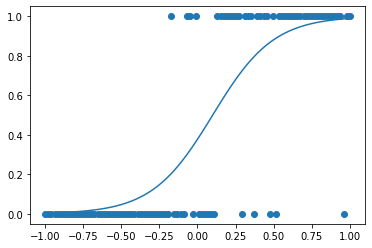

In [52]:
plt.plot(x, pi)
plt.scatter(x, y)
plt.show()

In [55]:
# X macierz, gdzie w pierwszej kolumnie jest siatka od -1 do 1, a w kolejny są kolejne potęgi tej wartości

X = np.vstack([x**p for p in range(1,20)]).T
X[:5,:5].round(2)

array([[-1.  ,  1.  , -1.  ,  1.  , -1.  ],
       [-0.98,  0.96, -0.94,  0.92, -0.9 ],
       [-0.96,  0.92, -0.88,  0.85, -0.81],
       [-0.94,  0.88, -0.83,  0.78, -0.73],
       [-0.92,  0.84, -0.78,  0.71, -0.66]])

In [58]:
model = LogisticRegression("none")
model.fit(X, y)
probs = model.predict_proba(X)[:,1]

/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


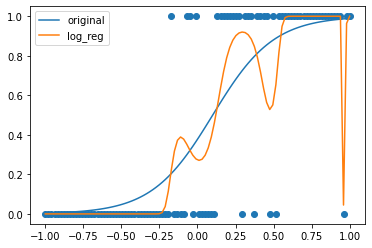

In [60]:
plt.plot(x, pi, label="original")
plt.plot(x, probs, label="log_reg")
plt.scatter(x, y)
plt.legend()
plt.show()

### Zadanie: 

Narysować wykresy krzywych prawdopodobieństwa w zależności od C.

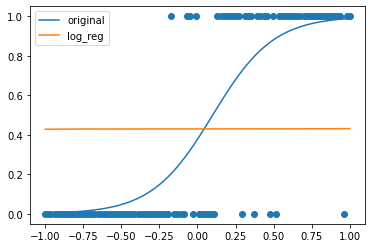

In [71]:
model = LogisticRegression("l2", C=0.0001)
model.fit(X, y)
probs = model.predict_proba(X)[:,1]

plt.plot(x, pi, label="original")
plt.plot(x, probs, label="log_reg")
plt.scatter(x, y)
plt.legend()
plt.show()

In [72]:
model.coef_

array([[ 2.19368366e-03,  7.51032128e-05,  1.16443663e-03,
         4.61280520e-05,  7.85675073e-04,  2.46900278e-05,
         5.91871692e-04,  1.14718620e-05,  4.75821927e-04,
         3.81563541e-06,  3.99561001e-04, -4.39262954e-07,
         3.46181181e-04, -2.63522065e-06,  3.07056997e-04,
        -3.56855896e-06,  2.77357012e-04, -3.71664533e-06,
         2.54178309e-04]])

Optymalizacja hiperparametrów

In [73]:
data = load_breast_cancer()
X = data.data
y = data.target

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25)

In [78]:
from sklearn.preprocessing import scale
?scale

In [ ]:
# opcja 1
X_train_sc = scale(X_train)
X_test_sc = scale(X_test)

# opcja 2:
X_scaled = scale(X)
X_train_sc, X_test_sc, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25)

# oba podejscia niepoprawne

In [ ]:
X_new -> co zrobić z nową oberwacj???

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [83]:
scaler.mean_

array([1.41545211e+01, 1.91022535e+01, 9.21126291e+01, 6.57544366e+02,
       9.64737089e-02, 1.03241878e-01, 8.81015228e-02, 4.88425258e-02,
       1.80439671e-01, 6.26313146e-02, 4.04183333e-01, 1.18789484e+00,
       2.84875986e+00, 4.07590094e+01, 7.00529108e-03, 2.49148568e-02,
       3.11333394e-02, 1.17359249e-02, 2.03671385e-02, 3.68153286e-03,
       1.63153779e+01, 2.54059155e+01, 1.07434624e+02, 8.86532629e+02,
       1.32704272e-01, 2.52700235e-01, 2.72940683e-01, 1.15166995e-01,
       2.89458451e-01, 8.37198826e-02])

In [87]:
scaler.scale_

array([3.50302092e+00, 4.22433183e+00, 2.41130813e+01, 3.52690190e+02,
       1.34792224e-02, 5.21619232e-02, 7.89848635e-02, 3.84296648e-02,
       2.71132029e-02, 6.99745243e-03, 2.86154894e-01, 5.29425375e-01,
       2.05212897e+00, 4.84260049e+01, 3.00418847e-03, 1.71293042e-02,
       2.65009272e-02, 5.72904328e-03, 8.22631678e-03, 2.32526388e-03,
       4.85061449e+00, 5.98431963e+00, 3.34263269e+01, 5.79290432e+02,
       2.19690394e-02, 1.55982973e-01, 2.10959714e-01, 6.49269993e-02,
       6.22053138e-02, 1.82495443e-02])

In [88]:
# lista pol w obiekcie:
# dir(scaler)

In [90]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
model = LogisticRegression("l2", C=10)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.986013986013986

In [10]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression

In [93]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [20]:
pipeline.fit(X_train, y_train)  # scaler.fit -> scaler.transform -> model.fit

/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('nonetype', None),
                ('logisticregression', LogisticRegression())])

In [21]:
pipeline.predict(X_test)  # scaler.transform -> model.predict

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [24]:
cross_val_score(pipeline, X, y, cv=10).mean()

/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.9437969924812029

In [98]:
from sklearn.model_selection import GridSearchCV
GridSearchCV?

In [99]:
model = Pipeline([("scaler", StandardScaler()), 
                  ("model", LogisticRegression())])
model

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [104]:
param_grid = {"model__C": [0.01, 0.1, 1, 10, 100]}

optimizer = GridSearchCV(model, param_grid, scoring="accuracy", cv=10, n_jobs=-1)
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1, param_grid={'model__C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [105]:
optimizer.best_params_

{'model__C': 0.1}

In [111]:
optimizer.best_estimator_.steps[1][1].coef_

array([[-0.3627251 , -0.40730882, -0.3557904 , -0.34073492, -0.09641922,
        -0.03481664, -0.378989  , -0.47039343, -0.01989741,  0.17171559,
        -0.46189236,  0.01336654, -0.3309825 , -0.33446287, -0.03180952,
         0.22006384,  0.05762443, -0.15850746,  0.15786849,  0.20227493,
        -0.47752207, -0.52567604, -0.43804768, -0.41332894, -0.32415892,
        -0.16645545, -0.35173519, -0.49015203, -0.37156243, -0.19128147]])

In [114]:
optimizer.best_estimator_.named_steps["model"].coef_

array([[-0.3627251 , -0.40730882, -0.3557904 , -0.34073492, -0.09641922,
        -0.03481664, -0.378989  , -0.47039343, -0.01989741,  0.17171559,
        -0.46189236,  0.01336654, -0.3309825 , -0.33446287, -0.03180952,
         0.22006384,  0.05762443, -0.15850746,  0.15786849,  0.20227493,
        -0.47752207, -0.52567604, -0.43804768, -0.41332894, -0.32415892,
        -0.16645545, -0.35173519, -0.49015203, -0.37156243, -0.19128147]])

In [116]:
optimizer.best_estimator_.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [118]:
optimizer.cv_results_["mean_test_score"]

array([0.95060908, 0.9717608 , 0.96716501, 0.96007752, 0.95526024])

In [119]:
optimizer.cv_results_["params"]

[{'model__C': 0.01},
 {'model__C': 0.1},
 {'model__C': 1},
 {'model__C': 10},
 {'model__C': 100}]

### Jak stwierdzić czy model jest dobrze dopasowany? Czy nie za słabo, ani za mocno?

1. Gdy na zbiorze testowym niski procent poprawnych predykcji (np. 60%), a na treningowym model bardzo dobrze dopasowany (np. 90%) -> model przeuczony

2. Gdy na zbiorze treningowym model bardzo nisko dopasowany (np. rzędu pięćdziesiąt kilka procent) -> model słabo dopasowany.

Co to jest niskie dopasowanie? -> zależy od danych...

Co to jest duża różnica? -> zależy od danych... (i ich wielkości - istotność statystyczna!). Realnie, wyniki na testowym powinny być trochę niższe od dopasowania na treningowym (najlepiej, gdy są takie same, ale jednak z reguły będą niższe). Klasyfikator w oczywisty sposób nie może działać lepiej niż dopasowanie na zbiorze treningowym - bo dopasowanie pokazuje jak dużo zależności wykrył w danych, na podstawie których będzie klasyfikował. Zatem jeżeli mamy dopasowanie na zbiorze treningowym np. 90%, to maksymalna moc predykcyjna jakiej możemy oczekiwać to 90%.

## Przygotowanie danych

Czy wartości zmiennych mają wpływ na wynik modelu?

Wyobraźmy sobie dwie zmienne, gdzie jedna ma wielkości rzędu 1, a druga rzędu 100, a rzeczywisty współczynnik przy pierwszej wynosi 1, a przy drugiej 0.01.

Jak konsekwencje będzie miało zastosowanie regularyzacji?

Zmienna pierwsza zostanie dużo mocniej "ukarana" niż druga, tzn. model mocno "ściągnie" współczynnik przy pierwszej, a zostawi przy drugiej...

Jak temu zaradzić? -> skalowanie

# Drzewo decyzyjne

Załóżmy, że mamy dwie zmienne $X[0], X[1]$ i problem klasyfikacji binarnej ($Y \in \{0,1\}$).


<img src="Grafika/decision_tree.png" style="width: 600px;">


## Jak rośnie drzewno?

Drzewo rośnie od korzenia - tzn. budujemy model od góry. Będąc w aktualnym węźle szukamy najlepszego podziału - rozpatrujemy wszystkie zmienne ze wszystkimi możliwymi podziałami i tworzymy rozgałęzienie według najlepszej opcji.

Co to znaczy najlpszy podział? 
<br>

Rozważmy klasyfikację binarną.

<br>

<br>

Opcja nr 1: Gini impurity (Miara Gini'ego niespójności węzła):
- wybieramy podział, który minimalizuje ważoną miarę Giniego $g(p) = 2p(1-p)$:

$$\frac{n_1}{N}g(p_1) + \frac{n_2}{N}g(p_2),$$

gdzie $n_1, n_2$ liczności w pierwszym i drugim dziecku, $N = n_1 + n_2$, $p_1, p_2$ - procent obserwacji, dla których $Y=1$ w dzieciach 1 i 2.

<img src="Grafika/gini_entropy.png" style="width: 400px;">

<br>

Opcja nr 2: Entropia.
- wybieramy podział, który daje najmniejszą wartość ważonej entropii $h(p) = -p\log{(p)} - (1-p)\log{(1-p)}$:

$$\frac{n_1}{N} h(p_1) + \frac{n_2}{N}h(p_2),$$

gdzie $p_1, p_2$ - procent obserwacji, dla których $Y=1$ w dzieciach 1 i 2.

## Do kiedy tworzymy nowe podziały? 

Możliwe są różne warunki stopu. Najpopularniejsze to:

- maksymalna głębokość drzewa,
- minimalna liczba obserwacji w liściu.

Często stosowane w połączeniu.

#### Zadanie 

Wczytaj zbiór `zbiór1.txt` (funkcja loadtxt w numpy) i podziel go na część uczącą (200 obserwacji) i testową (100). Dopasuj model regresji logistycznej na zbiorze uczącym i oblicz accuracy na zbiorze testowym. Następnie oblicz procent poprawnych dopasowań na zbiorze treningowym. Następnie zbuduj drzewo decyzyjne i policz dla niego accuracy.

In [120]:
data = np.loadtxt("Dane/zbior1.txt")
data[:3]

array([[0.9976836 , 0.91421931, 1.        ],
       [0.38299266, 0.41600768, 1.        ],
       [0.06317648, 0.31313783, 1.        ]])

In [121]:
from sklearn.tree import DecisionTreeClassifier
?DecisionTreeClassifier

In [122]:
X = data[:,:2]
y = data[:,2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)

In [126]:
model = LogisticRegression("none")
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.6

In [127]:
accuracy_score(y_train, model.predict(X_train))

0.56

In [128]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

1.0

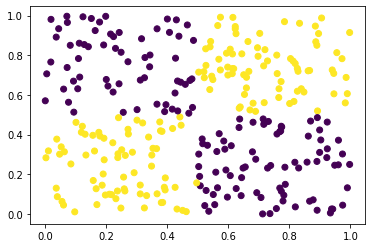

In [130]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [131]:
data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25)

In [136]:
X_train.shape

(426, 30)

In [142]:
?DecisionTreeClassifier

In [132]:
gs = GridSearchCV(DecisionTreeClassifier(), 
                  param_grid ={"criterion":["gini", "entropy"], 
                               "max_depth":[5, 7, 10, None], 
                               "min_samples_leaf":[2, 5, 10, 50]}, 
                  scoring="accuracy", 
                  cv=10, 
                  n_jobs=-1) 
gs.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [2, 5, 10, 50]},
             scoring='accuracy')

In [144]:
accuracy_score(y_train, gs.best_estimator_.predict(X_train))

0.9812206572769953

In [134]:
accuracy_score(y_test, gs.best_estimator_.predict(X_test))

0.9440559440559441

In [135]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

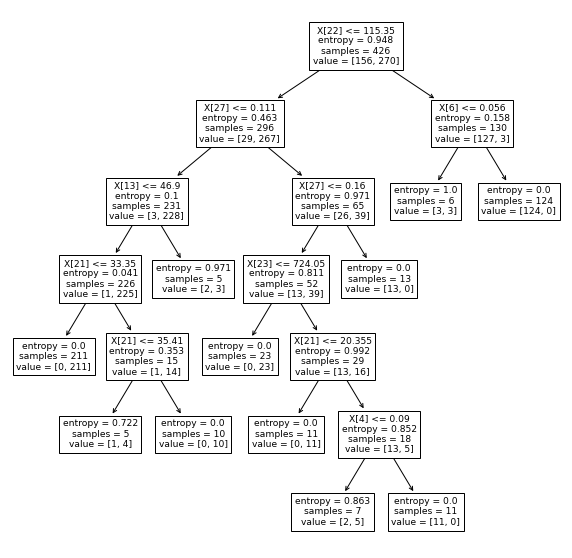

In [141]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plot_tree(gs.best_estimator_)
plt.show()

In [143]:
gs.best_estimator_.predict_proba(X_test) 
# prawdopobobienstwa na podstawie licznosci klas w lisciach

array([[1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. ,

# Klasyfikacja wieloklasowa

## Regresja logistyczna



\begin{align}
\Pr(Y_i=1) &= \frac{1}{Z} e^{\boldsymbol\beta_1 \cdot \mathbf{X}_i} \, \\
\Pr(Y_i=2) &= \frac{1}{Z} e^{\boldsymbol\beta_2 \cdot \mathbf{X}_i} \, \\
\cdots & \cdots \\
\Pr(Y_i=K-1) &= \frac{1}{Z} e^{\boldsymbol\beta_{K-1} \cdot \mathbf{X}_i} \, \\
\Pr(Y_i=K) &= \frac{1}{Z} e^{\boldsymbol\beta_{K} \cdot \mathbf{X}_i}\, \\
\end{align}


$Z = \sum_{k=1}^{K} e^{\boldsymbol\beta_k \cdot \mathbf{X}_i}$

Możliwe są również inne warianty. https://en.wikipedia.org/wiki/Multinomial_logistic_regression


Inny zapis powyższego:

$$[P(Y=1), P(Y=2), \ldots , P(Y=K)] = softmax([\beta_1x, \beta_2x, \ldots , \beta_Kx]) = $$
$$[\frac{e^{\beta_1x}}{\sum_{k=1}^{K}e^{\beta_kx}}, \frac{e^{\beta_2x}}{\sum_{k=1}^{K}e^{\beta_kx}}, \ldots, \frac{e^{\beta_Kx}}{\sum_{k=1}^{K}e^{\beta_k x}}]$$

Na marginesie: w uczeniu maszynowym często pojawia sie funkcja "softmax". 

$$softmax(\mathbf{x}) = softmax([x_1, x_2, \ldots , x_p])= [\frac{e^{x_1}}{\sum_{k=1}^{p}e^{x_k}}, \frac{e^{x_2}}{\sum_{k=1}^{p}e^{x_k}}, \ldots, \frac{e^{x_p}}{\sum_{k=1}^{p}e^{x_k}}]$$

W literaturze czasem mozna spotkać nazwanie regresji logistycznej dla klasyfikacji wieloklasowej klasyfikatorem softmax.

## Drzewo decyzyjne

Przyjmujemy oznaczenie: $p = (p_1, p_2, \ldots, p_K)$ wektor prawdopodobieństw poszczególnych klas (procent obserwacji danej klasy).

Opcja nr 1: Gini impurity (Miara Gini'ego niespójności węzła):
- wybieramy podział, który minimalizuje ważoną miarę Gini'ego $g(p) = \big( 1 - \sum\limits_{k=1}^K p_k^2 \big)$:

$$\frac{n_1}{N} g(p_1) + \frac{n_2}{N} g(p_2),$$

gdzie $n_1, n_2$ liczności w pierwszym i drugim dziecku, $p_1, p_2$ - rozkłady klas w dzieciach.

<br>

Opcja nr 2: Entropia.
- wybieramy podział, który daje najmniejszą wartość ważonej entropii $h(p) = -\sum\limits_{k=1}^K p_k\log p_k$:

$$\frac{n_1}{n}\sum\limits_{i=1}^{n_1} h(p_1) + \frac{n_2}{n}\sum\limits_{i=1}^{n_2} h(p_2)$$


In [145]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [146]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [159]:
model = LogisticRegression(C=0.001)
model.fit(X, y)

LogisticRegression(C=0.001)

In [160]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [163]:
model.predict_proba(X).round(3)

array([[0.433, 0.31 , 0.257],
       [0.433, 0.312, 0.256],
       [0.44 , 0.309, 0.251],
       [0.433, 0.312, 0.255],
       [0.435, 0.309, 0.256],
       [0.419, 0.313, 0.269],
       [0.437, 0.309, 0.254],
       [0.43 , 0.311, 0.259],
       [0.438, 0.311, 0.251],
       [0.431, 0.312, 0.257],
       [0.427, 0.311, 0.262],
       [0.429, 0.312, 0.259],
       [0.435, 0.311, 0.254],
       [0.452, 0.306, 0.242],
       [0.435, 0.307, 0.258],
       [0.425, 0.309, 0.266],
       [0.433, 0.308, 0.259],
       [0.432, 0.31 , 0.258],
       [0.416, 0.314, 0.27 ],
       [0.43 , 0.31 , 0.26 ],
       [0.419, 0.314, 0.267],
       [0.428, 0.311, 0.261],
       [0.454, 0.303, 0.243],
       [0.417, 0.315, 0.267],
       [0.419, 0.315, 0.266],
       [0.424, 0.314, 0.261],
       [0.424, 0.313, 0.263],
       [0.429, 0.311, 0.26 ],
       [0.431, 0.311, 0.258],
       [0.429, 0.312, 0.258],
       [0.427, 0.313, 0.259],
       [0.423, 0.313, 0.264],
       [0.434, 0.308, 0.258],
       [0.

#### Zadanie

Wygenerować predykcje kroswalidacyjnie dla regresji logistycznej i drzewa decyzyjnego (użyj `cross_val_predict`), a następnie wypisz accuracy i przedstaw tablicę klasyfikacji (`confusion_matrix` z `sklearn.metrics`) dla obu modeli.

Rozwiązanie:

In [164]:
from sklearn.model_selection import cross_val_predict

In [165]:
y_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [166]:
#macierz pomyłek
from sklearn.metrics import confusion_matrix

In [167]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])